Problem Statement: A company has a subscription product as the main source of revenue, and wants to minimize the customer churn.

Market: The target audience is the subscription base.

Product: The subsription product(fintech app)

Goal:To classify the customers into two classes:
Class 0:Customers likely to stay
Class 1:Customers likely to churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("churn_data.csv")

In [3]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [4]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
dataset.shape

(27000, 31)

CHECK FOR NULL VALUES

In [7]:
dataset.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
dataset = dataset[~np.isnan(dataset["age"])]

In [9]:
dataset = dataset.drop(["credit_score", "rewards_earned"], axis=1)

Since the number of null values in these columns are very high, columns are removed.

In [10]:
dataset.isnull().any()

user                       False
churn                      False
age                        False
housing                    False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
reward_rate                False
is_referred                False
dtype: bool

HISTOGRAMS

In [13]:
dataset2 = dataset.drop(["user","churn","zodiac_sign","housing","payment_type"], axis=1)

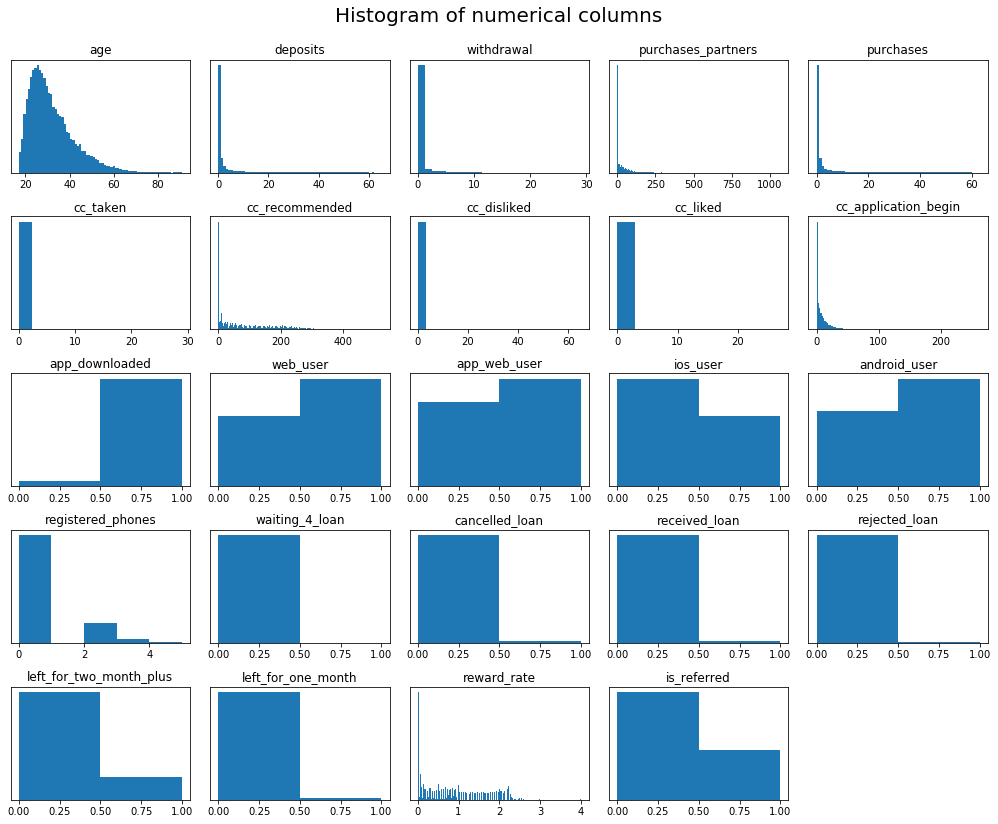

In [20]:
plt.figure(figsize=(14,12))
plt.suptitle("Histogram of numerical columns",fontsize=20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(5,5,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    vals = np.size(dataset2.iloc[:,i-1].unique())
    plt.hist(dataset2.iloc[:,i-1], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

PIE CHARTS

In [21]:
dataset3 = dataset[['housing','is_referred','app_downloaded','web_user', 'app_web_user', 'ios_user','android_user',
                    'registered_phones', 'payment_type', 'waiting_4_loan','cancelled_loan', 'received_loan', 'rejected_loan',
                    'zodiac_sign','left_for_two_month_plus', 'left_for_one_month',]]

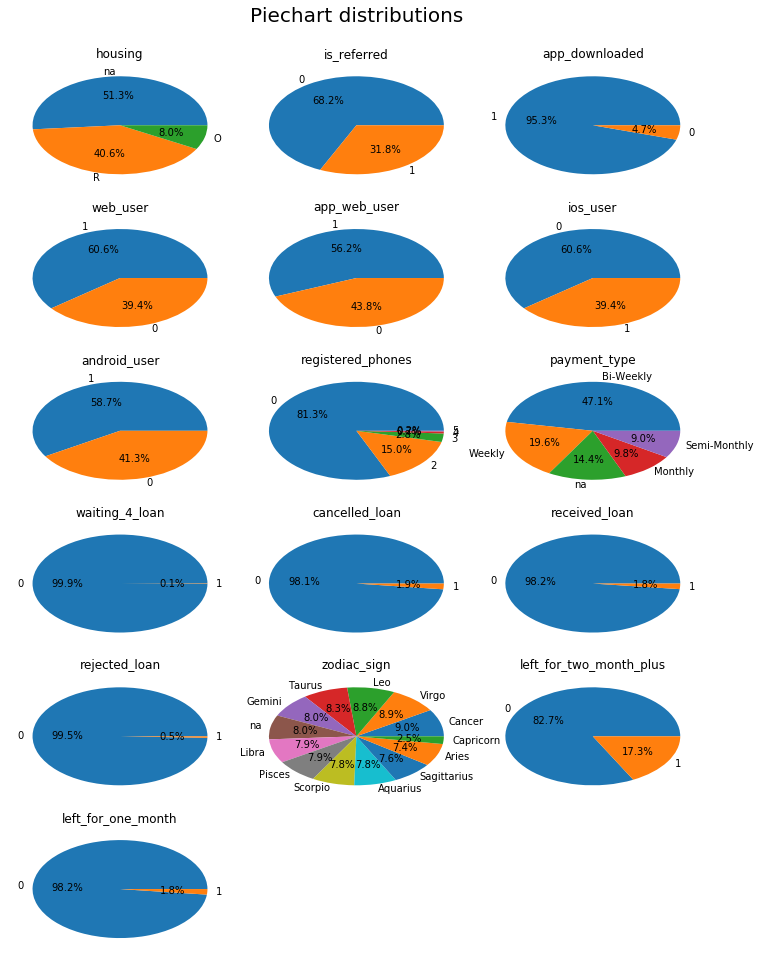

In [38]:
plt.figure(figsize=(10,14))
plt.suptitle("Piechart distributions",fontsize=20)

for i in range(1, dataset3.shape[1]+1):
    plt.subplot(6,3,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset3.columns.values[i-1])
    values = dataset3.iloc[:,i-1].value_counts(normalize=True).values
    index = dataset3.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values, labels=index, autopct='%.1f%%')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

There are 5 features in which the distribution of 1s and 0s is highly skewed, so we will verify whether these features induce any bias in the target variable.

In [39]:
dataset[dataset3.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [40]:
dataset[dataset3.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [41]:
dataset[dataset3.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [46]:
dataset[dataset3.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [47]:
dataset[dataset3.left_for_one_month==1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

Since the distribution under these variables seem to be unbiased we will consider them in our model.

CORRELATION WITH TARGET VARIABLE

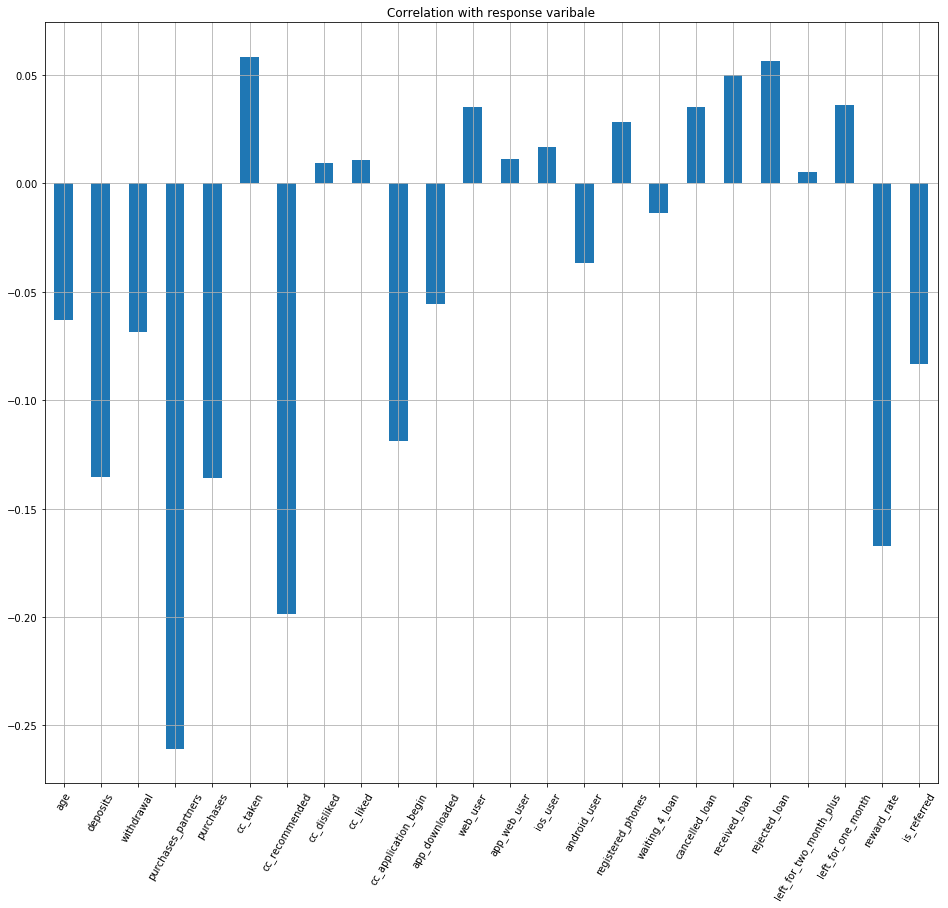

In [54]:
dataset2.corrwith(dataset.churn).plot.bar(figsize=(16,14), title="Correlation with response varibale",fontsize=10, rot=60,grid=True)
plt.show()

CORRELATION OF FEATURES

In [56]:
sns.set(style='white')
corr = dataset.drop(["user","churn"], axis=1).corr()

In [57]:
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [85]:
f, ax= plt.subplots(figsize=(20,15))

In [86]:
cmap= sns.diverging_palette(220,10, as_cmap=True)

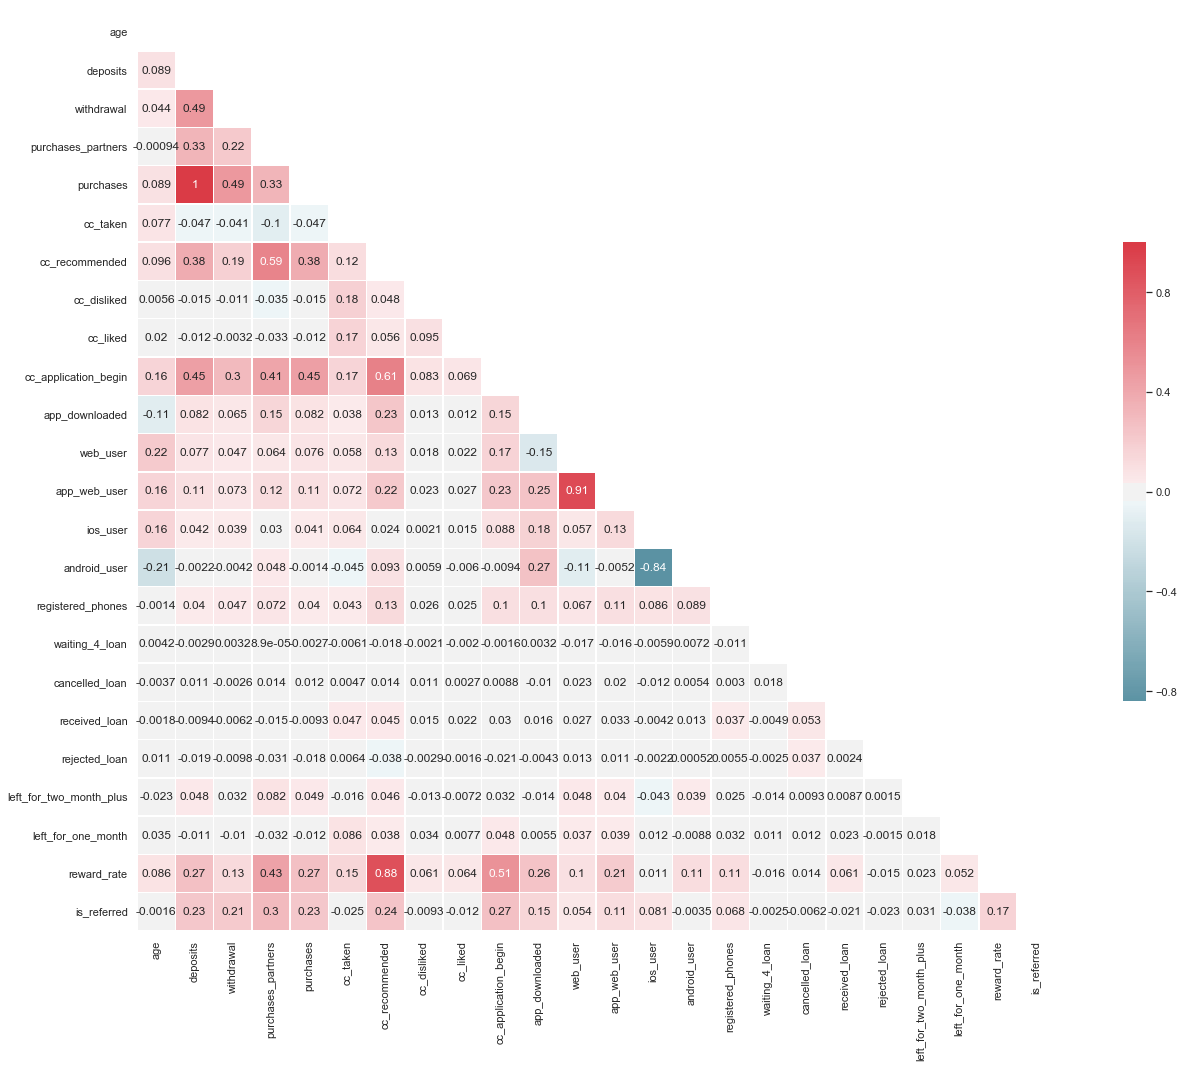

In [87]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink":.5}, annot=True)
plt.tight_layout()
plt.show()

In [88]:
dataset = dataset.drop(["app_web_user"], axis=1)

Since app_web_user is just a function of app_user and web_user, it is redundant. So we remove it.

In [89]:
user_identifier= dataset["user"]
dataset = dataset.drop(["user"], axis=1)

ONE HOT ENCODING

In [90]:
dataset = pd.get_dummies(dataset)

In [91]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [93]:
dataset = dataset.drop(["housing_na","payment_type_na","zodiac_sign_na"], axis=1)

In [94]:
X= dataset.drop(["churn"], axis=1)

In [95]:
y= dataset["churn"]

TRAIN TEST SPLIT

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [98]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

BALANCING

In [99]:
pos_index= y_train[y_train.values==1].index
neg_index= y_train[y_train.values==0].index

In [107]:
import random
if len(pos_index)>len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    higher=neg_index
    lower=pos_index
    
random.seed(0)
higher= np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)

In [113]:
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [115]:
y_train.value_counts()

1    8940
0    8940
Name: churn, dtype: int64

FEATURE SCALING

In [117]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values
X_train = X_train_scaled
X_test = X_test_scaled

In [120]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
y_pred = classifier.predict(X_test)

EVALUATION

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

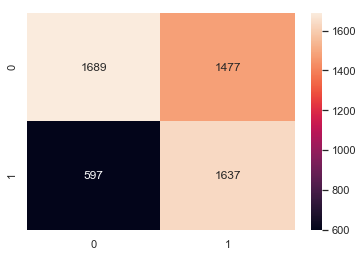

In [131]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [130]:
accuracy_score(y_test,y_pred)

0.6159259259259259

In [125]:
precision_score(y_test,y_pred)

0.5256904303147077

In [126]:
recall_score(y_test,y_pred)

0.7327663384064458

In [127]:
f1_score(y_test,y_pred)

0.6121914734480178

K FOLD CROSS VALIDATION

In [132]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)

In [133]:
accuracies

array([0.64597315, 0.63702461, 0.64373602, 0.64653244, 0.63478747,
       0.62807606, 0.63758389, 0.64205817, 0.6303132 , 0.64876957])

In [134]:
accuracies.mean()

0.6394854586129755

COEFFICIENTS OF CORRELATIONS OF FEATURES WITH TARGET

In [137]:
pd.concat([pd.DataFrame(X_train.columns, columns=['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],axis=1)

,features,coef
0,age,-0.162397
1,deposits,0.432671
2,withdrawal,0.060097
3,purchases_partners,-0.691097
4,purchases,-0.569112
5,cc_taken,0.077300
6,cc_recommended,0.052436
7,cc_disliked,0.006768
8,cc_liked,-0.013309
9,cc_application_begin,0.016870


FEATURE SELECTION USING RFE

In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
rfe= RFE(classifier, 20)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=20, step=1, verbose=0)

In [139]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False  True False False False False  True False False
 False False False False False]


In [140]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Gemini'],
      dtype='object')

In [141]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 19, 15, 14,  9,  1,  1,  8,  1,  1,  1,
        1,  1,  1,  1,  1, 22,  1,  3,  4, 10,  5,  1,  2, 12, 11,  7,  1,
       18,  6, 20, 13, 17, 16, 21])

RECREATING THE MODEL USING SELECTED FEATURES

In [142]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train[X_train.columns[rfe.support_]],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

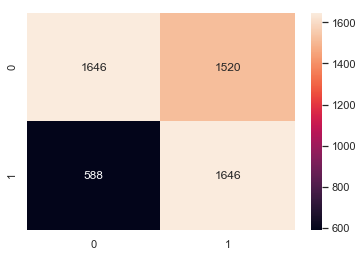

In [144]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [145]:
accuracy_score(y_test,y_pred)

0.6096296296296296

In [146]:
precision_score(y_test,y_pred)

0.5198989260897031

In [147]:
recall_score(y_test,y_pred)

0.7367949865711728

In [148]:
f1_score(y_test,y_pred)

0.6096296296296296

In [149]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns=['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],axis=1)

,features,coef
0,age,-0.161180
1,deposits,0.424668
2,withdrawal,0.063382
3,purchases_partners,-0.686002
4,purchases,-0.554205
5,cc_taken,0.081726
6,cc_recommended,0.068646
7,web_user,0.144711
8,ios_user,0.060410
9,registered_phones,0.103074


FINAL RESULTS

In [151]:
final_results = pd.concat([y_test,user_identifier], axis=1).dropna()

In [152]:
final_results["predicted_churn"]= y_pred

In [153]:
final_reults = final_results[['user','churn','predicted_churn']].reset_index(drop=True)

In [154]:
final_results

,churn,user,predicted_churn
4,1.0,61353,1
7,0.0,67679,0
8,0.0,21269,0
18,0.0,69531,1
22,0.0,25997,0
31,0.0,28827,0
36,1.0,58305,0
45,0.0,2351,1
48,0.0,11790,1
64,0.0,46727,0


Conclsusion: We were able to get an f1_score of 61% along with reducing number of features to 20 using RFE. Thus we can prevent upto 60% of users who are likely to churn using our model. 